In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Store filepath in a variable
data = "Resources/data.csv"
data_by_artist = "Resources/data_by_artist.csv"
data_by_genres = "Resources/data_by_genres.csv"
data_by_year = "Resources/data_by_year.csv"
data_w_genres = "Resources/data_w_genres.csv"

In [3]:
data_df = pd.read_csv(data, encoding="ISO-8859-1")
data_by_artist_df = pd.read_csv(data_by_artist, encoding="ISO-8859-1")
data_by_genres_df = pd.read_csv(data_by_genres, encoding="ISO-8859-1")
data_by_year_df = pd.read_csv(data_by_year, encoding="ISO-8859-1")
data_w_genres_df = pd.read_csv(data_w_genres, encoding="ISO-8859-1")
data_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [4]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [5]:
#clean artist names to allow for dataframe merge

data_df["artists"] = data_df["artists"].str.strip("[")
data_df["artists"] = data_df["artists"].str.strip("]")
data_df["artists"]

artists = tidy_split(data_df,"artists",sep=', ',keep=True)
artists["artists"] = artists["artists"].str.strip("'")
artists["artists"] = artists["artists"].str.strip('"')

In [6]:
merge_df = pd.merge(artists, data_w_genres_df, on="artists", how="outer")

In [7]:
merge_df.columns

Index(['acousticness_x', 'artists', 'danceability_x', 'duration_ms_x',
       'energy_x', 'explicit', 'id', 'instrumentalness_x', 'key_x',
       'liveness_x', 'loudness_x', 'mode_x', 'name', 'popularity_x',
       'release_date', 'speechiness_x', 'tempo_x', 'valence_x', 'year',
       'acousticness_y', 'danceability_y', 'duration_ms_y', 'energy_y',
       'instrumentalness_y', 'liveness_y', 'loudness_y', 'speechiness_y',
       'tempo_y', 'valence_y', 'popularity_y', 'key_y', 'mode_y', 'count',
       'genres'],
      dtype='object')

In [8]:
reordered_merge_df = merge_df[["artists", "year", "release_date", "genres", "name", "id", "popularity_x", "popularity_y", "danceability_x", "danceability_y", "tempo_x", "tempo_y", "energy_x", "energy_y", "acousticness_x", "acousticness_y", "duration_ms_x", "duration_ms_y", "explicit", "instrumentalness_x", "instrumentalness_y", "key_x", "key_y", "liveness_x", "liveness_y", "loudness_x", "loudness_y", "speechiness_x", "speechiness_y", "valence_x", "valence_y"]]


In [9]:
renamed_merge_df = reordered_merge_df.rename(columns={"popularity_x": "Popularity of Song",
                                        "popularity_y": "Avg Popularity of Artist",
                                        "danceability_x": "Danceability of Song",
                                        "danceability_y": "Avg Danceability of Artist",
                                        "tempo_x": "Tempo of Song",
                                        "tempo_y": "Avg Tempo of Artist",
                                        "energy_x": "Energy of Song",
                                        "energy_y": "Avg Energy of Artist",
                                        "acousticness_x": "Acousticness of Song", 
                                        "acousticness_y": "Avg Acousticness of Artist",
                                        "duration_ms_x": "Duration of Song",
                                        "duration_ms_y": "Avg Duration of Artist",
                                        "danceability_x": "Danceability of Song",
                                        "danceability_y": "Avg Danceability of Artist",
                                        "tempo_x": "Tempo of Song",
                                        "tempo_y": "Avg Tempo of Artist",
                                        "instrumentalness_x": "Instrumentalness of Song",
                                        "instrumentalness_y": "Instrumentalness of Artist",
                                        "key_x": "Key of Song",
                                        "key_y": "Avg Key of Artist",
                                        "loudness_x": "Loudness of Song",
                                        "loudness_y": "Avg Loudness of Artist",
                                        "speechiness_x": "Speechiness of Song",
                                        "speechiness_y": "Avg Speechiness of Artist",
                                        "valence_x": "Valence of Song",
                                        "valence_y": "Avg Valence of Artist",
                                        "liveness_x": "Liveness of Song",
                                        "liveness_y": "Avg Liveness of Artist",
                                       })

In [10]:
#clean genre names
renamed_merge_df["genres"].replace('\'','', regex=True, inplace=True)
renamed_merge_df["genres"] = renamed_merge_df["genres"].str.strip("[")
renamed_merge_df["genres"] = renamed_merge_df["genres"].str.strip("]")

In [11]:
#clean genre names

new_artists = tidy_split(renamed_merge_df,"genres",sep=', ',keep=False)
renamed_merge_df["genres"] = renamed_merge_df["genres"].str.lstrip()

In [12]:
#Check number of genres
this = new_artists["genres"].unique().tolist()
len(this)

3232

In [13]:
#Include only the columns I will be working with

smaller_artists = new_artists[["artists", "year", "genres", "name", "id", "Popularity of Song", "Avg Popularity of Artist", "Danceability of Song", "Valence of Song", "Loudness of Song", "Instrumentalness of Song", "Acousticness of Song"]].copy()
smaller_artists

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920.0,harlem renaissance,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.1875,0.598,0.634,-12.628,0.000522,0.991
0,Mamie Smith,1920.0,traditional blues,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.1875,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920.0,harlem renaissance,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.1875,0.647,0.689,-12.098,0.000018,0.993
1,Mamie Smith,1920.0,traditional blues,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.1875,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920.0,harlem renaissance,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.1875,0.782,0.487,-12.453,0.000002,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273323,"Victor Yturbe ""El Piruli""",NaN,ranchera,NaN,NaN,NaN,34.2000,NaN,NaN,NaN,NaN,NaN
273324,"Weiss, George D.",NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
273325,"Yessister, Jazzsister",NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
273326,\,NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN


In [14]:
#sort genres into parent categories

smaller_artists.loc[smaller_artists['genres'].str.contains('folk', case=False), 'genres'] = 'Folk'
smaller_artists.loc[smaller_artists['genres'].str.contains('country', case=False), 'genres'] = 'Country'
smaller_artists.loc[smaller_artists['genres'].str.contains('rap', case=False), 'genres'] = 'Hip-Hop'
smaller_artists.loc[smaller_artists['genres'].str.contains('rock', case=False), 'genres'] = 'Rock'
smaller_artists.loc[smaller_artists['genres'].str.contains('pop', case=False), 'genres'] = 'Pop'
smaller_artists.loc[smaller_artists['genres'].str.contains('classical', case=False), 'genres'] = 'Classical'
smaller_artists.loc[smaller_artists['genres'].str.contains('jazz', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('blues', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('adult standards', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('hip hop', case=False), 'genres'] = 'Hip-Hop'
smaller_artists.loc[smaller_artists['genres'].str.contains('mellow gold', case=False), 'genres'] = 'Rock'
smaller_artists.loc[smaller_artists['genres'].str.contains('funk', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('bop', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('lounge', case=False), 'genres'] = 'Pop'
smaller_artists.loc[smaller_artists['genres'].str.contains('big band', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('orchestra', case=False), 'genres'] = 'Classical'
smaller_artists.loc[smaller_artists['genres'].str.contains('motown', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('swing', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('quiet storm', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('permanent wave', case=False), 'genres'] = 'Rock'
smaller_artists.loc[smaller_artists['genres'].str.contains('easy listening', case=False), 'genres'] = 'Pop'
smaller_artists.loc[smaller_artists['genres'].str.contains('singer-songwriter', case=False), 'genres'] = 'Folk'
smaller_artists.loc[smaller_artists['genres'].str.contains('urban contemporary', case=False), 'genres'] = 'Hip-Hop'
smaller_artists.loc[smaller_artists['genres'].str.contains('soul', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('disco', case=False), 'genres'] = 'Pop'
smaller_artists.loc[smaller_artists['genres'].str.contains('r&b', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('metal', case=False), 'genres'] = 'Rock'
smaller_artists.loc[smaller_artists['genres'].str.contains('latin', case=False), 'genres'] = 'R&B'
smaller_artists

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920.0,harlem renaissance,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.1875,0.598,0.634,-12.628,0.000522,0.991
0,Mamie Smith,1920.0,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.1875,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920.0,harlem renaissance,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.1875,0.647,0.689,-12.098,0.000018,0.993
1,Mamie Smith,1920.0,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.1875,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920.0,harlem renaissance,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.1875,0.782,0.487,-12.453,0.000002,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273323,"Victor Yturbe ""El Piruli""",NaN,ranchera,NaN,NaN,NaN,34.2000,NaN,NaN,NaN,NaN,NaN
273324,"Weiss, George D.",NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
273325,"Yessister, Jazzsister",NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
273326,\,NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN


In [15]:
smaller_artists.value_counts("genres").head()

genres
Rock         192674
Jazz         105950
Pop           91906
R&B           62540
Classical     61064
dtype: int64

In [47]:
#remove instances where genre and id occur twice

genres = ["Rock", "Jazz", "Pop", "R&B", "Classical", "Hip-Hop", "Folk", "Country"]
whatever_df = smaller_artists[~(smaller_artists[['genres','id']].duplicated(keep=False))]
                              
whatever_df

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920.0,harlem renaissance,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.187500,0.598,0.634,-12.628,0.000522,0.991
0,Mamie Smith,1920.0,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.187500,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920.0,harlem renaissance,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.187500,0.647,0.689,-12.098,0.000018,0.993
1,Mamie Smith,1920.0,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.187500,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920.0,harlem renaissance,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.187500,0.782,0.487,-12.453,0.000002,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273308,"Sergio Vega ""El Shaka""",NaN,banda,NaN,NaN,NaN,60.714286,NaN,NaN,NaN,NaN,NaN
273308,"Sergio Vega ""El Shaka""",NaN,corrido,NaN,NaN,NaN,60.714286,NaN,NaN,NaN,NaN,NaN
273308,"Sergio Vega ""El Shaka""",NaN,nuevo regional mexicano,NaN,NaN,NaN,60.714286,NaN,NaN,NaN,NaN,NaN
273308,"Sergio Vega ""El Shaka""",NaN,regional mexican,NaN,NaN,NaN,60.714286,NaN,NaN,NaN,NaN,NaN


In [48]:
#Only keep rows found in genre list

artists_by_genre = whatever_df.loc[whatever_df["genres"].isin(genres)]
artists_by_genre                                  

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920.0,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.187500,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920.0,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.187500,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920.0,R&B,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.187500,0.782,0.487,-12.453,0.000002,0.992
3,Mamie Smith,1920.0,R&B,Kansas City Man Blues - 78rpm Version,0lqEx4vktZP1y9hnwfF27Y,4.0,3.187500,0.482,0.461,-12.619,0.000061,0.995
4,Mamie Smith,1920.0,R&B,Miss Jenny's Ball (aka There'll Be No Freebies...,4HYmmG8uHL2hP4zSFWavKF,1.0,3.187500,0.574,0.764,-14.171,0.000492,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273182,SPiCYSOL,2020.0,Pop,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12.0,12.000000,0.608,0.212,-8.539,0.000002,0.282
273182,SPiCYSOL,2020.0,R&B,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12.0,12.000000,0.608,0.212,-8.539,0.000002,0.282
273198,Sfera Ebbasta,2021.0,Pop,Baby,2GIJ1Lw3ZoYUUYCABVjPcQ,1.0,1.000000,0.755,0.606,-1.957,0.001420,0.125
273221,"""Weird Al"" Yankovic",NaN,Rock,NaN,NaN,NaN,32.867925,NaN,NaN,NaN,NaN,NaN


In [18]:
artists_by_genre.value_counts("year").head(30)

year
1972.0    1733
1969.0    1638
1973.0    1602
1970.0    1541
1968.0    1528
1978.0    1524
1976.0    1523
1975.0    1520
1965.0    1497
1974.0    1493
1967.0    1476
1971.0    1464
1963.0    1440
1962.0    1403
1980.0    1373
1964.0    1368
1981.0    1342
1959.0    1301
1960.0    1290
1977.0    1289
1979.0    1264
1991.0    1262
1997.0    1246
1982.0    1228
1989.0    1227
1956.0    1223
1990.0    1223
1958.0    1222
2002.0    1213
1996.0    1209
dtype: int64

In [19]:
#remove ".0" from "year" values

artists_by_genre['year'] = artists_by_genre['year'].astype(str).apply(lambda x: x.split('.')[0])

<ipython-input-19-aac59f87ed3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_by_genre['year'] = artists_by_genre['year'].astype(str).apply(lambda x: x.split('.')[0])


In [21]:
artists_by_genre["year"].value_counts()

1972    1733
1969    1638
1973    1602
1970    1541
1968    1528
        ... 
1925      50
1923      49
1924      36
1921      15
nan        2
Name: year, Length: 102, dtype: int64

In [22]:
artists_by_genre

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.187500,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.187500,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920,R&B,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.187500,0.782,0.487,-12.453,0.000002,0.992
3,Mamie Smith,1920,R&B,Kansas City Man Blues - 78rpm Version,0lqEx4vktZP1y9hnwfF27Y,4.0,3.187500,0.482,0.461,-12.619,0.000061,0.995
4,Mamie Smith,1920,R&B,Miss Jenny's Ball (aka There'll Be No Freebies...,4HYmmG8uHL2hP4zSFWavKF,1.0,3.187500,0.574,0.764,-14.171,0.000492,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273182,SPiCYSOL,2020,Pop,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12.0,12.000000,0.608,0.212,-8.539,0.000002,0.282
273182,SPiCYSOL,2020,R&B,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12.0,12.000000,0.608,0.212,-8.539,0.000002,0.282
273198,Sfera Ebbasta,2021,Pop,Baby,2GIJ1Lw3ZoYUUYCABVjPcQ,1.0,1.000000,0.755,0.606,-1.957,0.001420,0.125
273221,"""Weird Al"" Yankovic",nan,Rock,NaN,NaN,NaN,32.867925,NaN,NaN,NaN,NaN,NaN


In [23]:
#I manually removed 2 rows in Excel and reimported

artists_by_genre2 = "Resources/artists_by_genre.csv"
artists_by_genre2 = pd.read_csv(artists_by_genre2, encoding="ISO-8859-1")
artists_by_genre2

,Unnamed: 0,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist
0,0,Mamie Smith,1920,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12,3.1875
1,1,Mamie Smith,1920,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4,3.1875
2,2,Mamie Smith,1920,R&B,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5,3.1875
3,3,Mamie Smith,1920,R&B,Kansas City Man Blues - 78rpm Version,0lqEx4vktZP1y9hnwfF27Y,4,3.1875
4,4,Mamie Smith,1920,R&B,Miss Jenny's Ball (aka There'll Be No Freebies...,4HYmmG8uHL2hP4zSFWavKF,1,3.1875
...,...,...,...,...,...,...,...,...
86294,273169,ITZY,2020,Pop,WANNABE,6tCssnvTUREcperDOUTqvA,77,77.0000
86295,273174,Lil Xxel,2020,Pop,LMK,4s0hDz7zGgZUav9EvzyLsB,71,71.0000
86296,273182,SPiCYSOL,2020,Pop,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12,12.0000
86297,273182,SPiCYSOL,2020,R&B,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12,12.0000


In [24]:
years_chart = artists_by_genre2["year"].unique().tolist()
years_chart.sort()
len(years_chart)

101

In [25]:
artists_by_genre2.groupby('year')['genres'].value_counts()


year  genres   
1920  Classical    26
      Rock         12
      R&B           9
      Pop           6
      Folk          1
                   ..
2021  Country      63
      Rock          7
      Jazz          3
      Classical     2
      Folk          2
Name: genres, Length: 770, dtype: int64

In [26]:
genres_by_year_rating = artists_by_genre2.groupby(["genres","year"])["Popularity of Song"].mean()

genre_ratings = genres_by_year_rating.unstack(level=0)
genre_ratings.columns = [x for x in genre_ratings.columns]
genre_ratings.head()

,Classical,Country,Folk,Hip-Hop,Jazz,Pop,R&B,Rock
year,,,,,,,,
1920,2.846154,NaN,0.0,0.0,0.000000,0.166667,3.000000,0.75
1921,0.750000,NaN,1.0,0.0,0.000000,0.000000,NaN,NaN
1923,0.000000,7.0,NaN,NaN,5.944444,NaN,7.448276,NaN
1924,0.000000,NaN,NaN,NaN,0.040000,1.714286,0.500000,NaN
1925,2.666667,NaN,NaN,0.0,4.439024,3.000000,0.000000,NaN


In [27]:
clean_genre_ratings = genre_ratings.fillna(0).round(3)
clean_genre_ratings

,Classical,Country,Folk,Hip-Hop,Jazz,Pop,R&B,Rock
year,,,,,,,,
1920,2.846,0.000,0.000,0.000,0.000,0.167,3.000,0.750
1921,0.750,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1923,0.000,7.000,0.000,0.000,5.944,0.000,7.448,0.000
1924,0.000,0.000,0.000,0.000,0.040,1.714,0.500,0.000
1925,2.667,0.000,0.000,0.000,4.439,3.000,0.000,0.000
...,...,...,...,...,...,...,...,...
2017,4.077,41.357,36.440,53.358,16.462,41.551,56.411,43.952
2018,11.500,39.616,22.000,56.744,19.067,40.601,53.766,26.397
2019,5.750,22.357,37.682,54.485,12.667,47.492,58.667,43.944


In [28]:
genres_by_year = artists_by_genre2.groupby(["year"])["genres"].value_counts()
genre_year_count = genres_by_year.unstack(level=0)
genre_year_count.columns = [x for x in genre_year_count.columns]
genre_year_count.head()

,1920,1921,1923,1924,1925,1926,1927,1928,1929,1930,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
genres,,,,,,,,,,,,,,,,,,,,,
Classical,26.0,4.0,1.0,2.0,3.0,20.0,51.0,18.0,1.0,44.0,...,4.0,12.0,5.0,8.0,78.0,13.0,8.0,4.0,8.0,2.0
Country,NaN,NaN,1.0,NaN,NaN,NaN,47.0,36.0,18.0,40.0,...,89.0,23.0,26.0,36.0,33.0,42.0,73.0,84.0,32.0,63.0
Folk,1.0,3.0,NaN,NaN,NaN,33.0,2.0,30.0,1.0,42.0,...,84.0,80.0,89.0,230.0,104.0,25.0,48.0,22.0,40.0,2.0
Hip-Hop,1.0,1.0,NaN,NaN,2.0,NaN,NaN,9.0,13.0,1.0,...,73.0,72.0,58.0,74.0,89.0,53.0,90.0,101.0,163.0,174.0
Jazz,1.0,1.0,18.0,25.0,41.0,66.0,48.0,14.0,3.0,22.0,...,28.0,26.0,11.0,185.0,71.0,26.0,15.0,21.0,86.0,3.0


In [29]:
clean_genre_year_count = genre_year_count.fillna(0).astype(int)
clean_genre_year_count

,1920,1921,1923,1924,1925,1926,1927,1928,1929,1930,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
genres,,,,,,,,,,,,,,,,,,,,,
Classical,26,4,1,2,3,20,51,18,1,44,...,4,12,5,8,78,13,8,4,8,2
Country,0,0,1,0,0,0,47,36,18,40,...,89,23,26,36,33,42,73,84,32,63
Folk,1,3,0,0,0,33,2,30,1,42,...,84,80,89,230,104,25,48,22,40,2
Hip-Hop,1,1,0,0,2,0,0,9,13,1,...,73,72,58,74,89,53,90,101,163,174
Jazz,1,1,18,25,41,66,48,14,3,22,...,28,26,11,185,71,26,15,21,86,3
Pop,6,6,0,7,3,15,8,157,125,127,...,194,347,240,346,231,216,273,193,272,146
R&B,9,0,29,2,1,0,5,31,20,26,...,116,85,127,127,130,112,124,81,184,307
Rock,12,0,0,0,0,0,2,166,114,207,...,188,140,155,103,117,84,131,90,76,7


In [30]:
years = clean_genre_year_count.keys()

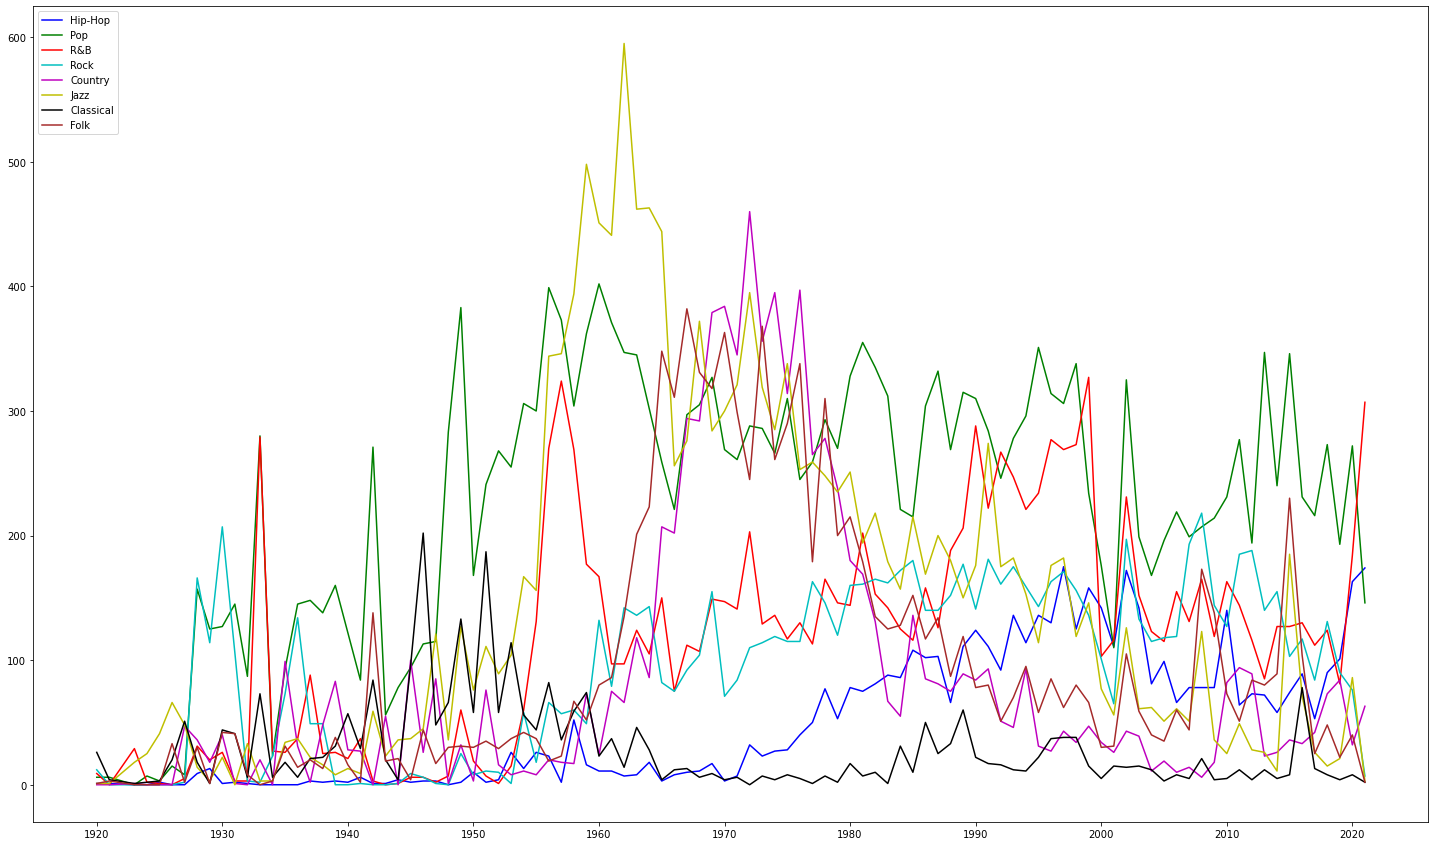

In [31]:
plt.figure(figsize = (25,15))
plt.xticks(range(1920,2021,10))

hip_hop, = plt.plot(years, clean_genre_year_count.loc['Hip-Hop',:], 
                        color="b", label="Hip-Hop")
pop, = plt.plot(years, clean_genre_year_count.loc['Pop',:], 
                        color="g", label="Pop")
r_b, = plt.plot(years, clean_genre_year_count.loc['R&B',:], 
                        color="r", label="R&B")
rock, = plt.plot(years, clean_genre_year_count.loc['Rock',:], 
                        color="c", label="Rock")
country, = plt.plot(years, clean_genre_year_count.loc['Country',:], 
                        color="m", label="Country")
jazz, = plt.plot(years, clean_genre_year_count.loc['Jazz',:], 
                        color="y", label="Jazz")
classical, = plt.plot(years, clean_genre_year_count.loc['Classical',:], 
                        color="k", label="Classical")
folk, = plt.plot(years, clean_genre_year_count.loc['Folk',:], 
                        color="brown", label="Folk")



plt.legend(loc="upper left")
plt.savefig("Resources/GenrePrevalence.png")
plt.show()

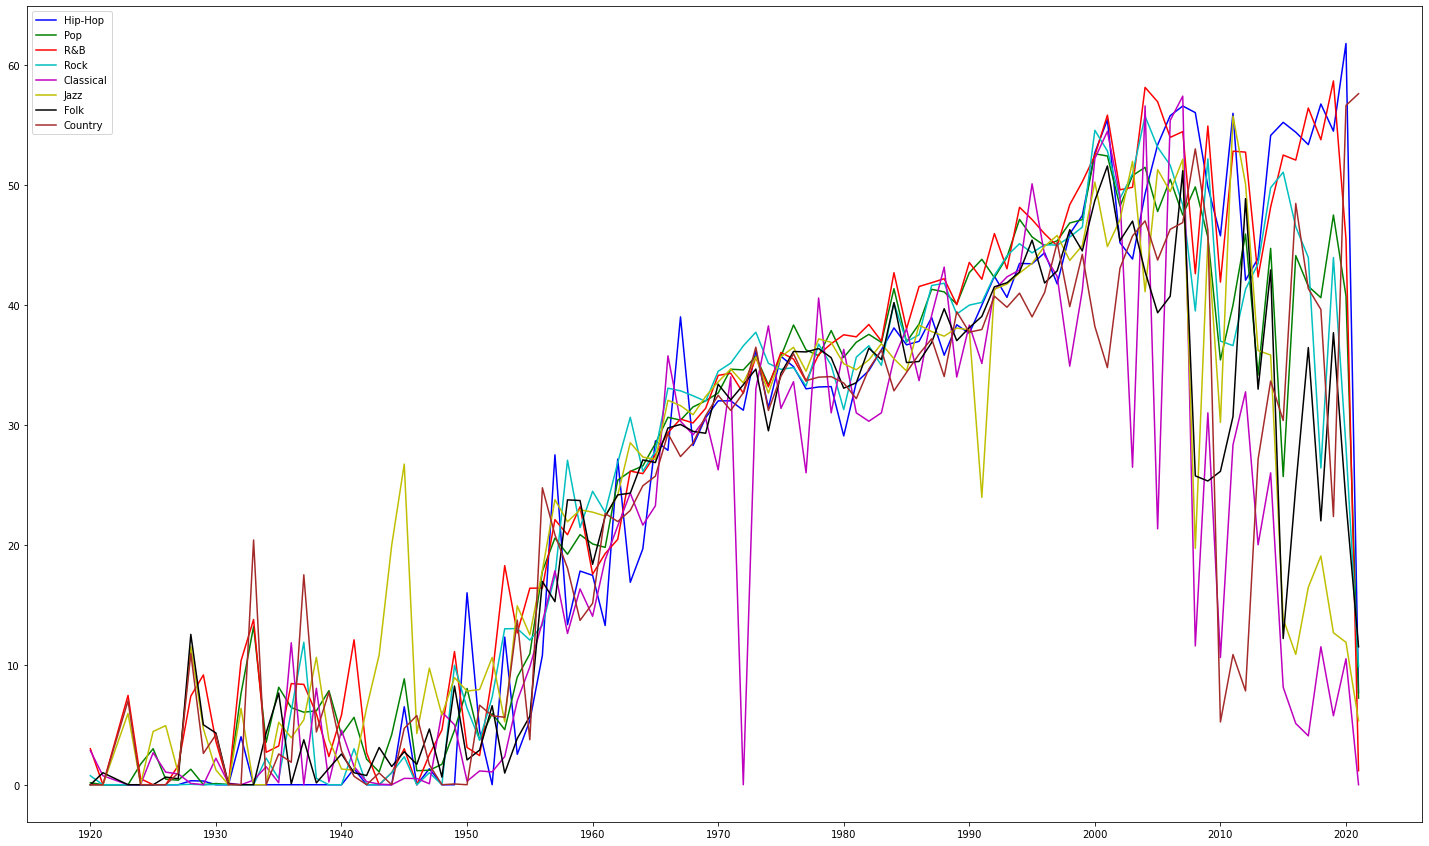

In [32]:
plt.figure(figsize = (25,15))
plt.xticks(range(1920,2021,10))

hip_hop, = plt.plot(years, clean_genre_ratings.loc[:, 'Hip-Hop'], 
                        color="b", label="Hip-Hop")
pop, = plt.plot(years, clean_genre_ratings.loc[:, 'Pop'], 
                        color="g", label="Pop")
r_b, = plt.plot(years, clean_genre_ratings.loc[:, 'R&B'], 
                        color="r", label="R&B")
rock, = plt.plot(years, clean_genre_ratings.loc[:, 'Rock'], 
                        color="c", label="Rock")
classical, = plt.plot(years, clean_genre_ratings.loc[:, 'Classical'], 
                        color="m", label="Classical")
jazz, = plt.plot(years, clean_genre_ratings.loc[:, 'Jazz'], 
                        color="y", label="Jazz")
folk, = plt.plot(years, clean_genre_ratings.loc[:, 'Folk'], 
                        color="k", label="Folk")
country, = plt.plot(years, clean_genre_ratings.loc[:, 'Country'], 
                        color="brown", label="Country")



plt.legend(loc="upper left")
#plt.savefig("Resources/GenrePopularityOverTimehiphop.png")
plt.show()

In [33]:
genre_artist_rating = artists_by_genre2.groupby(["genres","artists"])["Popularity of Song"].mean()
artist_ratings = genre_artist_rating.unstack(level=0)
artist_ratings.columns = [x for x in artist_ratings.columns]
artist_ratings.head()

,Classical,Country,Folk,Hip-Hop,Jazz,Pop,R&B,Rock
artists,,,,,,,,
((( O ))),NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN
070 Shake,NaN,NaN,NaN,62.000000,NaN,NaN,62.0,NaN
10 Ft. Ganja Plant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0
10 Years,NaN,NaN,NaN,57.666667,NaN,NaN,NaN,NaN
"10,000 Maniacs",NaN,NaN,37.882353,NaN,NaN,37.882353,NaN,NaN


In [34]:
artist_ratings.loc[:, 'Hip-Hop']

artists
((( O )))                   66.000000
070 Shake                   62.000000
10 Ft. Ganja Plant                NaN
10 Years                    57.666667
10,000 Maniacs                    NaN
                              ...    
Ã©ÂÂ³Ã©ÂºÂÃ¦ÂÂ¯                NaN
Ã©Â ÂÃ§ÂÂ°Ã¦ÂÂ¯Ã¥ÂÂª          NaN
Ã©Â»ÂÃ¨Â±Â¹                      NaN
ÃªÂ¹ÂÃ¬ÂÂÃ¬Â²Â                 NaN
Ã¬Â¡Â°Ã¬Â ÂÃ­ÂÂ                NaN
Name: Hip-Hop, Length: 7010, dtype: float64

In [49]:
#A function to display 20 most popular artists within a genre. Otherwise unused.
artist_ratings.sort_values('Hip-Hop', ascending=False).head(20)

,Classical,Country,Folk,Hip-Hop,Jazz,Pop,R&B,Rock
artists,,,,,,,,
Justin Quiles,NaN,NaN,NaN,86.500000,NaN,NaN,86.500000,NaN
Jerry Di,NaN,NaN,NaN,86.000000,NaN,86.000000,86.000000,NaN
Rauw Alejandro,NaN,NaN,NaN,85.000000,NaN,80.666667,NaN,NaN
Cali Y El Dandee,NaN,NaN,NaN,83.000000,NaN,NaN,NaN,NaN
Piso 21,NaN,NaN,NaN,82.500000,NaN,NaN,81.000000,NaN
Sech,NaN,NaN,NaN,81.000000,NaN,58.090909,81.000000,NaN
benny blanco,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN
Myke Towers,NaN,NaN,NaN,80.500000,NaN,NaN,NaN,NaN
StaySolidRocky,NaN,NaN,NaN,79.000000,NaN,NaN,NaN,NaN


In [36]:
#obtain values
genres_by_acousticness = artists_by_genre.groupby(["genres"])["Acousticness of Song"].mean()
genres_by_acousticness

genres
Classical    0.805361
Country      0.431053
Folk         0.441614
Hip-Hop      0.237198
Jazz         0.575745
Pop          0.509114
R&B          0.420278
Rock         0.403529
Name: Acousticness of Song, dtype: float64

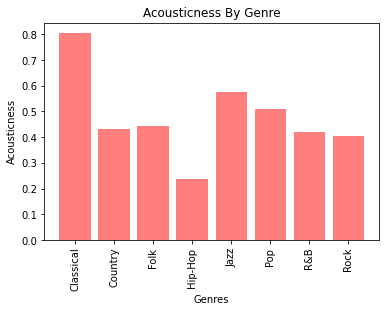

In [37]:
#manually input values
genres_by_acousticness = artists_by_genre.groupby(["genres"])["Acousticness of Song"].mean()
genres = ["Classical", "Country", "Folk", "Hip-Hop", "Jazz", "Pop", "R&B", "Rock"]
acousticness = [0.805361, 0.431053, 0.441614, 0.237198, 0.575745, 0.509114, 0.420278, 0.403529]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, acousticness, color='r', alpha=0.5, align="center")
plt.title("Acousticness By Genre")
plt.xlabel("Genres")
plt.ylabel("Acousticness")
plt.savefig("Resources/GenreAcousticness.png")

In [38]:
#obtain values
genres_by_instrumentalness = artists_by_genre.groupby(["genres"])["Instrumentalness of Song"].mean()
genres_by_instrumentalness

genres
Classical    0.366660
Country      0.079335
Folk         0.090675
Hip-Hop      0.069285
Jazz         0.121906
Pop          0.134017
R&B          0.092798
Rock         0.095185
Name: Instrumentalness of Song, dtype: float64

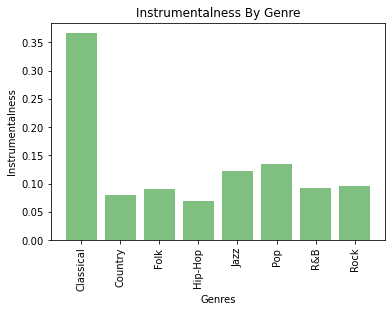

In [39]:
#manually input values
genres_by_instrumentalness = artists_by_genre.groupby(["genres"])["Instrumentalness of Song"].mean()
genres = ["Classical", "Country", "Folk", "Hip-Hop", "Jazz", "Pop", "R&B", "Rock"]
instrumentalness = [0.366660, 0.079335, 0.090675, 0.069285, 0.121906, 0.134017, 0.092798, 0.095185]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, instrumentalness, color='g', alpha=0.5, align="center")
plt.title("Instrumentalness By Genre")
plt.xlabel("Genres")
plt.ylabel("Instrumentalness")
plt.savefig("Resources/GenreInstrumentalness.png")


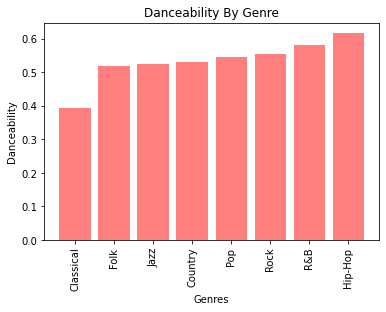

In [40]:
genres_by_danceability = artists_by_genre.groupby(["genres"])["Danceability of Song"].mean()
genres = ["Classical", "Folk", "Jazz", "Country", "Pop", "Rock", "R&B", "Hip-Hop"]
danceability = [0.393659, 0.518735, 0.525007, 0.531633, 0.545774, 0.555276, 0.581127, 0.616933]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, danceability, color='r', alpha=0.5, align="center")
plt.title("Danceability By Genre")
plt.xlabel("Genres")
plt.ylabel("Danceability")
plt.savefig("Resources/GenreDanceability.png")

In [41]:
#A function to be used if organizing by year
genres_by_danceability2 = artists_by_genre[(artists_by_genre['year'] > '1979')].groupby(["genres"])["Loudness of Song"].mean()

genres_by_danceability2

genres
Classical   -14.132336
Country      -9.990237
Folk        -10.270065
Hip-Hop      -7.906925
Jazz        -10.950009
Pop          -9.055767
R&B          -8.248574
Rock         -9.152528
Name: Loudness of Song, dtype: float64

In [42]:
genres_by_valence = artists_by_genre.groupby(["genres"])["Valence of Song"].mean()
genres_by_valence

genres
Classical    0.346701
Country      0.607198
Folk         0.571278
Hip-Hop      0.537084
Jazz         0.553414
Pop          0.552669
R&B          0.571747
Rock         0.562616
Name: Valence of Song, dtype: float64

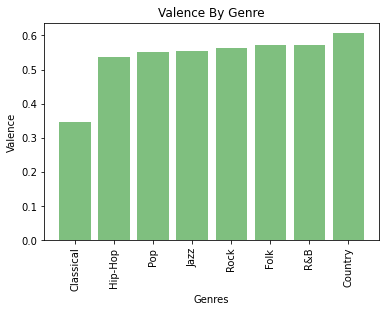

In [43]:
genres = ["Classical", "Hip-Hop", "Pop", "Jazz", "Rock", "Folk", "R&B", "Country"]
valence = [0.346701, 0.537084, 0.552669, 0.553414, 0.562616, 0.571278, 0.571747, 0.607198]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, valence, color='g', alpha=0.5, align="center")
plt.title("Valence By Genre")
plt.xlabel("Genres")
plt.ylabel("Valence")
plt.savefig("Resources/GenreValence.png")

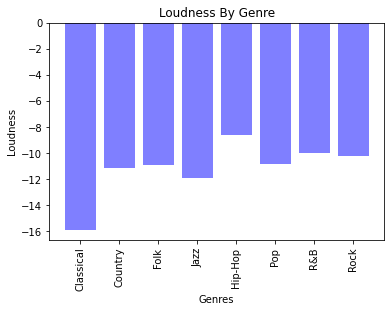

In [51]:
genres = ["Classical", "Country", "Folk", "Jazz", "Hip-Hop", "Pop", "R&B", "Rock"]
loudness = [-15.880191, -11.127195, -10.903209, -11.919795, -8.618875, -10.859964, -10.022046, -10.264087]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, loudness, color='b', alpha=0.5, align="center")
plt.title("Loudness By Genre")
plt.xlabel("Genres")
plt.ylabel("Loudness")
plt.savefig("Resources/GenreLoudness.png")

In [ ]:
genres_by_danceability2 = artists_by_genre[(artists_by_genre['year'] > '1979')].groupby(["genres"])["Loudness of Song"].mean()
genres_by_danceability2